In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

AMPLITUDE_THRESHOLD = 0.2


df = pd.read_csv("/home/alpha/programs/python_files/datasets/cnv_and_mut/entitiesWES.csv")

# some samples have more columns, filter them out and drop all samples from 450k. Usually theier ID begins with 9 or 3
# df = df.dropna(axis=1)
df = df.drop(columns=["Unnamed: 0"])


# Make it amplitude agnostic (experimental) 
# comment out the lines with AMPLITUDE_THRESHOLD
y = df[["entity","sample"]]
df = df.drop(columns=["entity","sample"])
df = df.dropna(axis=1)

## CUSTOM PREPROCESSING
df = 2*((df-df.min())/(df.max()-df.min()))-1
df = (df-df.mean())/df.std()
df[df < -AMPLITUDE_THRESHOLD] = -1
df[df > AMPLITUDE_THRESHOLD] = 1
df[(df <= AMPLITUDE_THRESHOLD) & (df >= -AMPLITUDE_THRESHOLD)] = 0
df.drop(columns=df.columns[(df == 0.0).all()])
cols_with_zero = []


# print(df)
# for i in df.columns.to_list():
#     print(i)
#     if i.sum() == 0:
#         df = df.drop(i)

df["ID"] = y["sample"]
df["entity"] = y["entity"]




# make features
features = df.columns.tolist()
features.remove("entity")
features.remove("ID")

df.head()

,1-0,1-100000,1-500000,1-700000,1-800000,1-900000,1-1000000,1-1100000,1-1200000,1-1300000,...,22-50500000,22-50600000,22-50700000,22-50800000,22-50900000,22-51000000,22-51100000,22-51200000,ID,entity
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,266896,K27
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,334684,MEDULLO_SHH
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,334644,PITUIZYTOM
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,333386,DIFF_HOCH_GLIOM_PEDIATRISCH
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,334434,GBM


## Make PCA and UMAP

### Einstellungen, welche gut funktioniert haben

- PRINCIPAL_COMPONENTS = 5 N_NEIGHBORS = 15 (standardScaler, no custom preprocessing) 
- 


(62, 5)


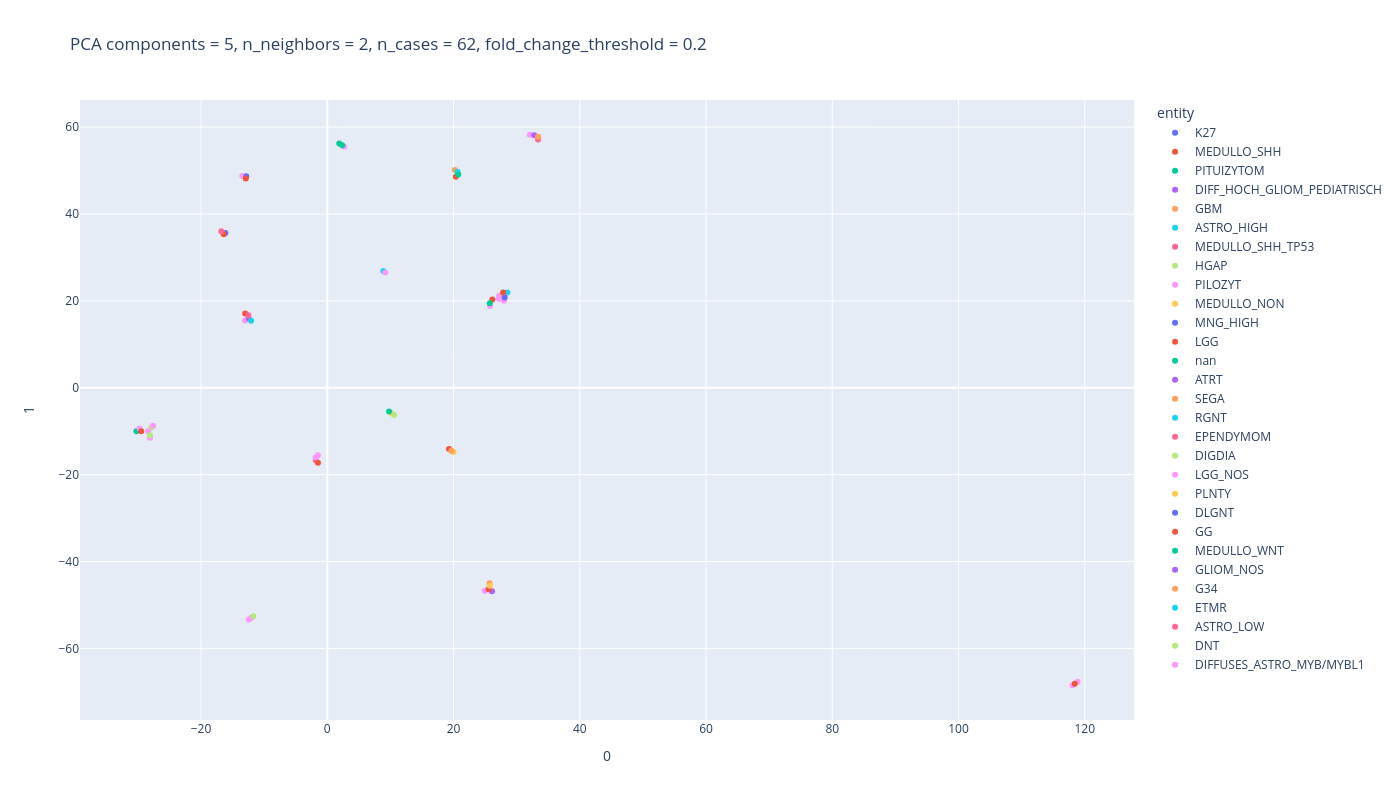

In [10]:

PRINCIPAL_COMPONENTS = 5
N_NEIGHBORS = 2


# make targets and scale the data
x = df.loc[:,features].values
y_entity = df.loc[:,"entity"].values
y_id = df.loc[:,"ID"].values
# x = StandardScaler().fit_transform(x)


pca_denoize = PCA(n_components=PRINCIPAL_COMPONENTS)
denoize = pca_denoize.fit_transform(x)
print(denoize.shape)

umap_2d = UMAP(n_neighbors=N_NEIGHBORS,n_epochs=5000,random_state=1,spread=2.5,min_dist=0.5,init="random")
umap_2d.fit(denoize)

projections = umap_2d.transform(denoize)

fig = px.scatter(
    projections, x=0, y=1,
    title= f'PCA components = {PRINCIPAL_COMPONENTS}, n_neighbors = {N_NEIGHBORS}, n_cases = {df.shape[0]}, fold_change_threshold = {AMPLITUDE_THRESHOLD}' ,
    color=y_entity.astype(str), labels={'color': 'entity'},
    opacity=1
)

fig.update_layout(width=1200, height=800)

# fig2 = px.scatter(
#     projections, x=0, y=1,
#     title= f'PCA components = {PRINCIPAL_COMPONENTS}, n_neighbors = {N_NEIGHBORS}, n_cases = {df.shape[0]}',
#     color=y_id.astype(str), labels={'color': 'entity'},
#     opacity=1
# )

# fig2.update_layout(width=1200, height=800)

# fig.show()
# fig2.show()